In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("classification_training_data.csv")

In [4]:
data.shape

(100000, 46)

In [5]:
data.head(10)

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
5,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
6,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
7,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
8,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
9,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


In [7]:
#check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [8]:
#find null value
data.isnull().sum()

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword    

In [9]:
#to find zero percentage
col_with_zero = []
for i in data.columns:
    perc_zero = (data[i]==0).mean()*100
    col_with_zero.append((i,perc_zero))

z_df = pd.DataFrame(col_with_zero,columns=["column_name","zero_perc"]).sort_values("zero_perc",ascending=False)
z_df

,column_name,zero_perc
27,days_since_last_visit,100.000
13,youtube,100.000
40,bounces,99.965
3,totals_newVisits,97.962
30,bounce_rate,96.614
12,historic_session_page,63.239
15,avg_session_time_page,63.239
44,has_converted,48.273
42,transactionRevenue,38.801
41,time_on_site,13.163


In [10]:
#to check data is balanced or not
data.has_converted.value_counts()

has_converted
1    51727
0    48273
Name: count, dtype: int64

In [12]:
#duplicate check
dup_counts = data.duplicated().sum()
dup_counts

90793

In [13]:
print("overall data: ",data.shape)
print("duplicate data: ",dup_counts)

overall data:  (100000, 46)
duplicate data:  90793


In [14]:
#removing duplicates
data=data.drop_duplicates()

In [15]:
data.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [16]:
data1=data.drop(['device_browser','days_since_last_visit','bounces','totals_newVisits','bounce_rate','device_isMobile','youtube','geoNetwork_latitude','geoNetwork_longitude','device_operatingSystem','target_date','earliest_medium','latest_medium','latest_keyword','earliest_keyword','earliest_isTrueDirect','latest_isTrueDirect','channelGrouping'],axis=1)

In [17]:
data1

,count_session,count_hit,device_deviceCategory,geoNetwork_region,historic_session,historic_session_page,avg_session_time,avg_session_time_page,single_page_rate,sessionQualityDim,...,avg_visit_time,days_since_first_visit,visits_per_day,earliest_source,latest_source,num_interactions,time_on_site,transactionRevenue,products_array,has_converted
0,9,1194,mobile,Sharjah,6504,1254,722.666667,139.333333,0.777778,6,...,18,17,66.333333,gulfnews,gulfnews,1900,5617,0,food////food////food,0
2,28,1816,mobile,Ajman,12466,4963,445.214286,177.250000,0.821429,4,...,11,24,73.480000,(direct),google,3843,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1
3,2,299,mobile,Abu Dhabi,1575,0,787.500000,0.000000,1.000000,42,...,17,7,37.375000,google,google,592,1576,0,food////food,0
16,3,507,mobile,Abu Dhabi,1000,0,333.333333,0.000000,1.000000,2,...,15,1,253.500000,google,google,507,1958,28745286,(not set)////(not set)////baby_products--chang...,1
20,9,1037,mobile,Dubai,3659,0,406.555556,0.000000,1.000000,5,...,10,24,41.480000,mobile,Pricena_AE,1674,138440,1054124685,food////food////food////food////food////food//...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,mobile,Abu Dhabi,166,0,166.000000,0.000000,1.000000,2,...,19,0,195.000000,google,google,471,278,0,(not set)////(not set),0
99907,28,3071,mobile,Abu Dhabi,15860,4173,566.428571,149.035714,0.857143,4,...,13,30,99.064516,google,google,4071,3810,183879066,food////food////food,0
99908,7,1018,mobile,Dubai,859,0,122.714286,0.000000,1.000000,2,...,14,22,44.260870,google,google,7258,0,363923999,"baby_products--changing_&_bathing--diapers,_wi...",1
99921,6,818,mobile,Dubai,1772,0,295.333333,0.000000,1.000000,6,...,14,24,32.720000,(direct),google,818,2958,0,food////food////food////food////food,0


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   device_deviceCategory   9207 non-null   object 
 3   geoNetwork_region       9207 non-null   object 
 4   historic_session        9207 non-null   int64  
 5   historic_session_page   9207 non-null   int64  
 6   avg_session_time        9207 non-null   float64
 7   avg_session_time_page   9207 non-null   float64
 8   single_page_rate        9207 non-null   float64
 9   sessionQualityDim       9207 non-null   int64  
 10  last_visitId            9207 non-null   int64  
 11  latest_visit_id         9207 non-null   int64  
 12  visitId_threshold       9207 non-null   int64  
 13  earliest_visit_id       9207 non-null   int64  
 14  earliest_visit_number   9207 non-null   int6

In [19]:
#encoding data
encode=LabelEncoder()
for i in data1.select_dtypes(include=['object']).columns:
    data1[i]=encode.fit_transform(data1[i])

In [20]:
data1

,count_session,count_hit,device_deviceCategory,geoNetwork_region,historic_session,historic_session_page,avg_session_time,avg_session_time_page,single_page_rate,sessionQualityDim,...,avg_visit_time,days_since_first_visit,visits_per_day,earliest_source,latest_source,num_interactions,time_on_site,transactionRevenue,products_array,has_converted
0,9,1194,1,71,6504,1254,722.666667,139.333333,0.777778,6,...,18,17,66.333333,25,5,1900,5617,0,2265,0
2,28,1816,1,2,12466,4963,445.214286,177.250000,0.821429,4,...,11,24,73.480000,0,4,3843,77417,1477195214,898,1
3,2,299,1,1,1575,0,787.500000,0.000000,1.000000,42,...,17,7,37.375000,24,4,592,1576,0,2234,0
16,3,507,1,1,1000,0,333.333333,0.000000,1.000000,2,...,15,1,253.500000,24,4,507,1958,28745286,414,1
20,9,1037,1,25,3659,0,406.555556,0.000000,1.000000,5,...,10,24,41.480000,30,0,1674,138440,1054124685,2506,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,1,1,166,0,166.000000,0.000000,1.000000,2,...,19,0,195.000000,24,4,471,278,0,1,0
99907,28,3071,1,1,15860,4173,566.428571,149.035714,0.857143,4,...,13,30,99.064516,24,4,4071,3810,183879066,2265,0
99908,7,1018,1,25,859,0,122.714286,0.000000,1.000000,2,...,14,22,44.260870,24,4,7258,0,363923999,1353,1
99921,6,818,1,25,1772,0,295.333333,0.000000,1.000000,6,...,14,24,32.720000,0,4,818,2958,0,2299,0


In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   device_deviceCategory   9207 non-null   int32  
 3   geoNetwork_region       9207 non-null   int32  
 4   historic_session        9207 non-null   int64  
 5   historic_session_page   9207 non-null   int64  
 6   avg_session_time        9207 non-null   float64
 7   avg_session_time_page   9207 non-null   float64
 8   single_page_rate        9207 non-null   float64
 9   sessionQualityDim       9207 non-null   int64  
 10  last_visitId            9207 non-null   int64  
 11  latest_visit_id         9207 non-null   int64  
 12  visitId_threshold       9207 non-null   int64  
 13  earliest_visit_id       9207 non-null   int64  
 14  earliest_visit_number   9207 non-null   int6

In [22]:
import seaborn as sns

<Axes: >

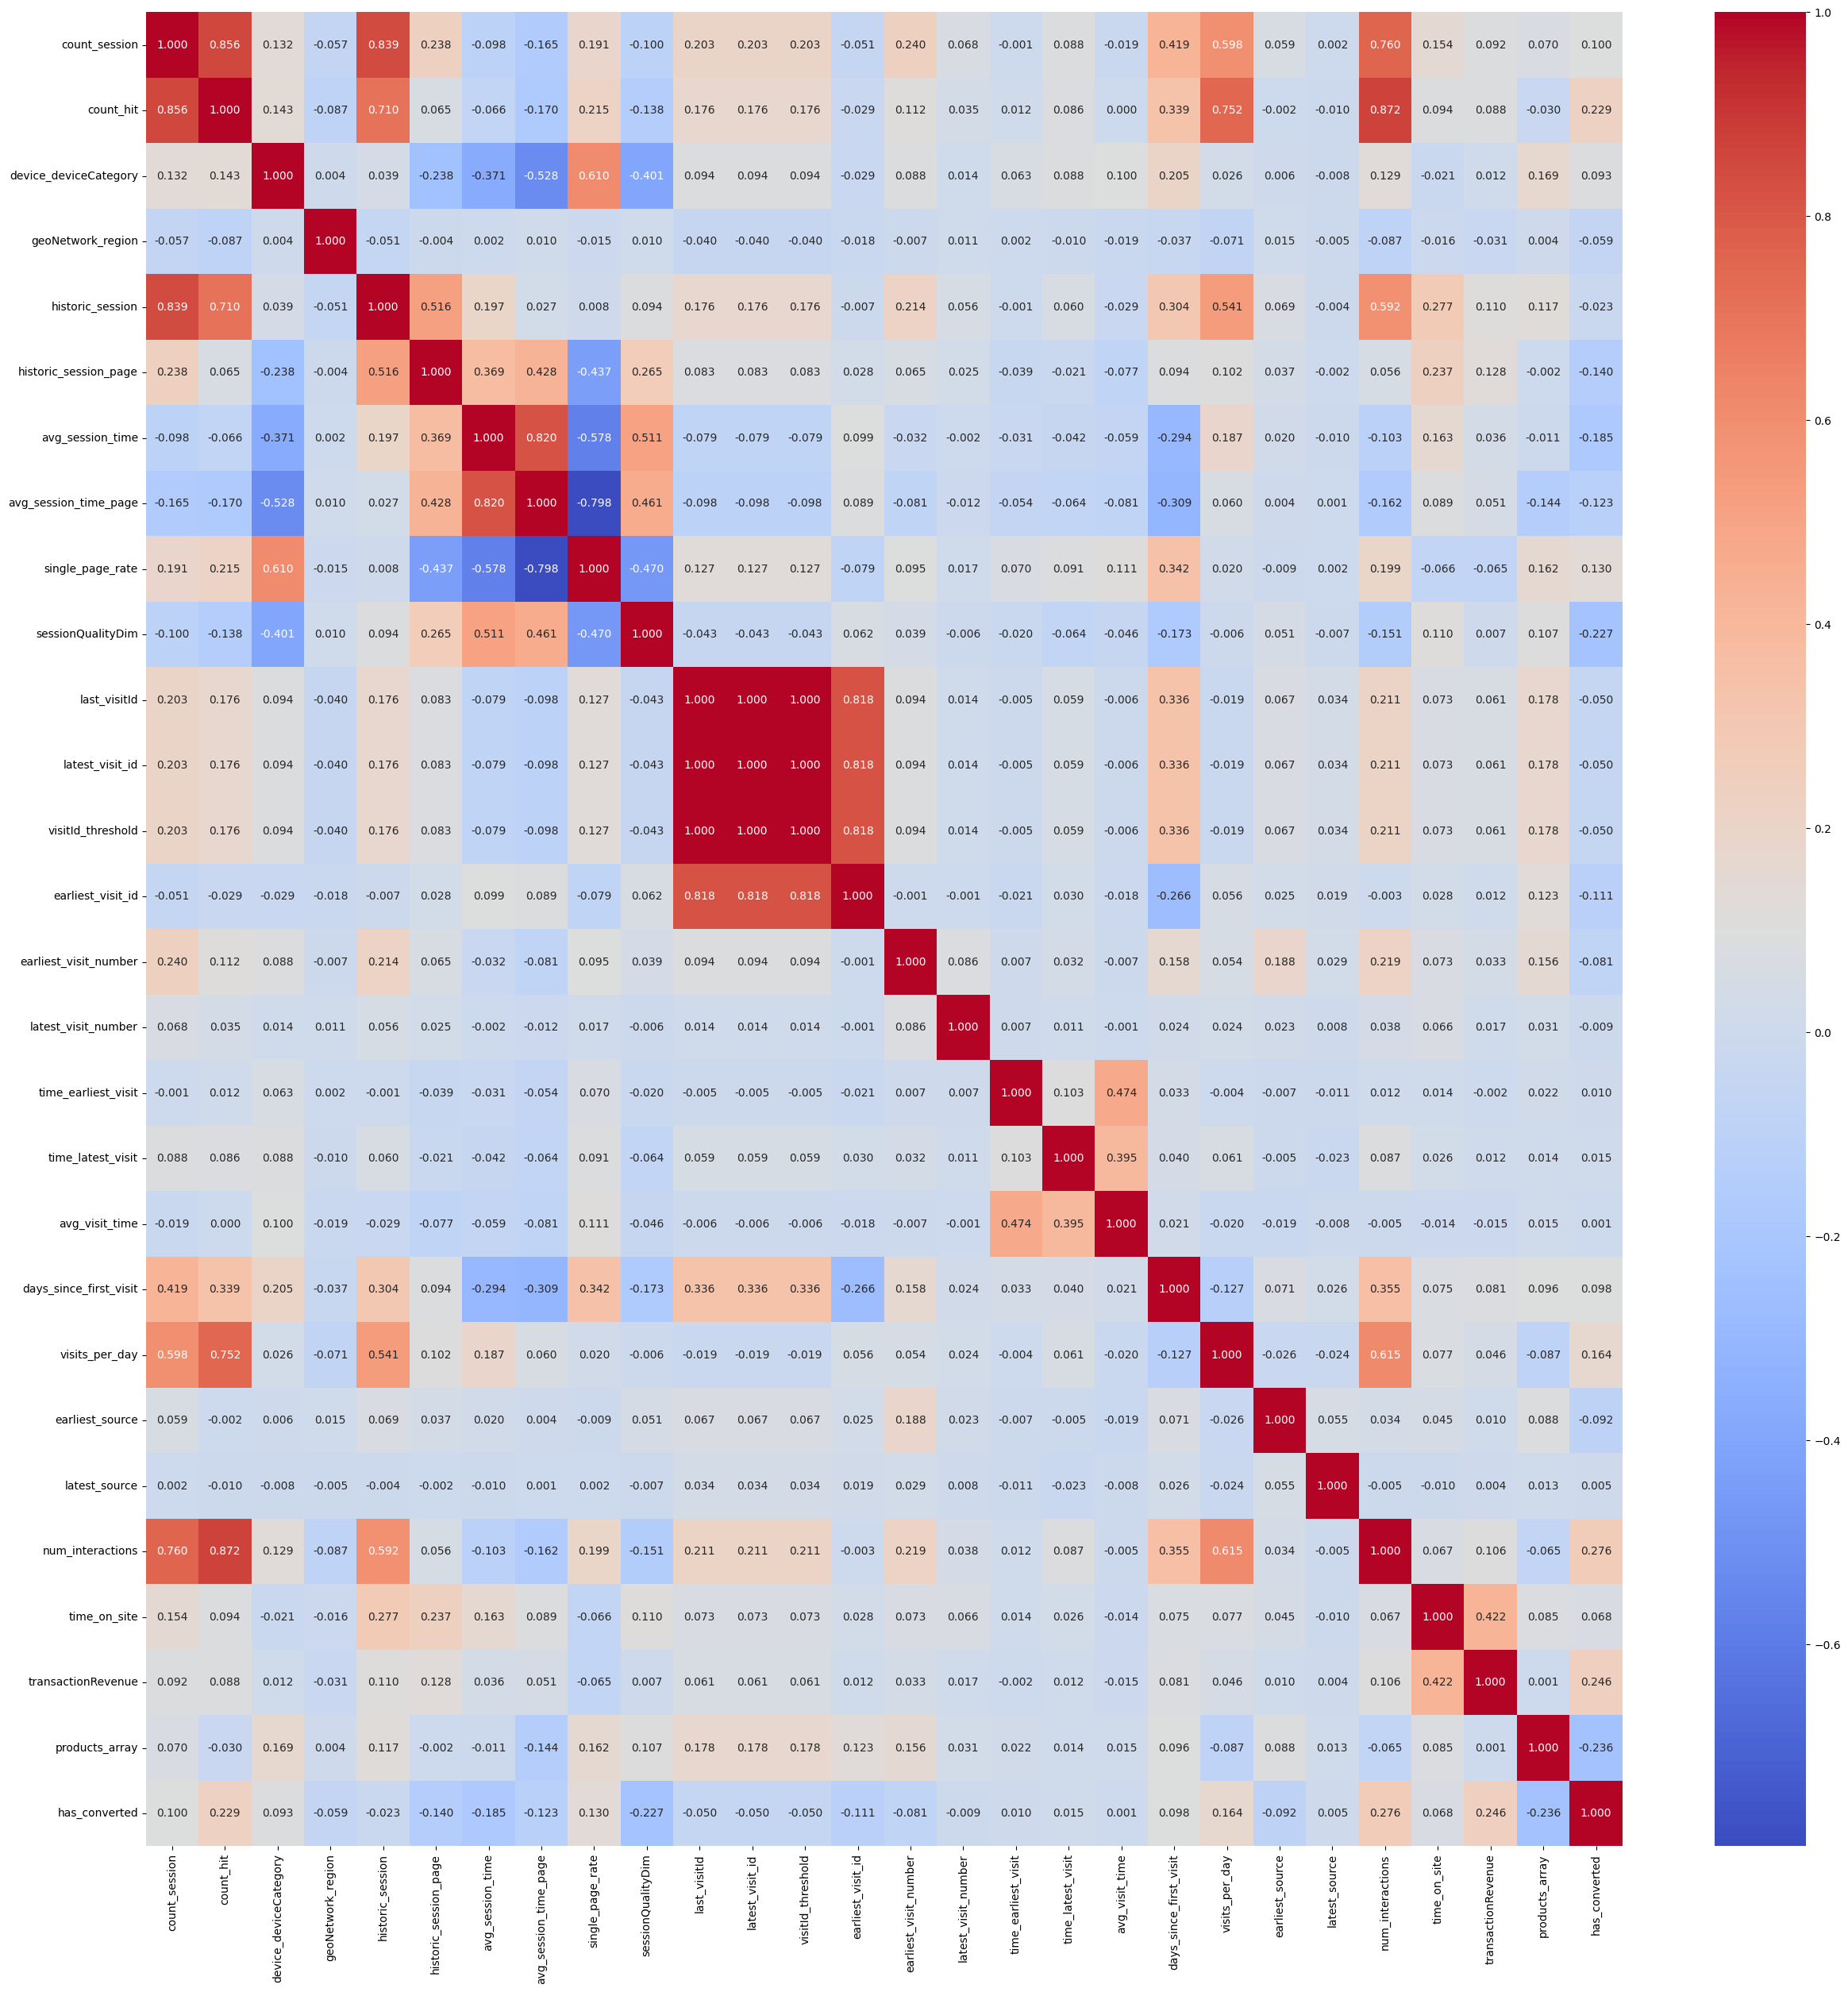

In [23]:
#correlation
corr_data = data1.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_data,annot=True,cmap="coolwarm",fmt=".3f")

In [24]:
hig_co = set()

for i in range(len(corr_data.columns)):
    for j in range(i):
        corr = corr_data.iloc[i,j]
        c_name  = corr_data.columns[i]
        if abs(corr) > 0.8:
            hig_co.add(c_name)

In [25]:
hig_co

{'avg_session_time_page',
 'count_hit',
 'earliest_visit_id',
 'historic_session',
 'latest_visit_id',
 'num_interactions',
 'visitId_threshold'}

In [26]:
data2=data1.drop(hig_co,axis=1)

In [27]:
data2

,count_session,device_deviceCategory,geoNetwork_region,historic_session_page,avg_session_time,single_page_rate,sessionQualityDim,last_visitId,earliest_visit_number,latest_visit_number,...,time_latest_visit,avg_visit_time,days_since_first_visit,visits_per_day,earliest_source,latest_source,time_on_site,transactionRevenue,products_array,has_converted
0,9,1,71,1254,722.666667,0.777778,6,1619809803,24,32,...,19.17,18,17,66.333333,25,5,5617,0,2265,0
2,28,1,2,4963,445.214286,0.821429,4,1619867532,8,62,...,11.20,11,24,73.480000,0,4,77417,1477195214,898,1
3,2,1,1,0,787.500000,1.000000,42,1617893676,46,47,...,14.90,17,7,37.375000,24,4,1576,0,2234,0
16,3,1,1,0,333.333333,1.000000,2,1616569212,5,14,...,7.00,15,1,253.500000,24,4,1958,28745286,414,1
20,9,1,25,0,406.555556,1.000000,5,1619681505,42,50,...,7.52,10,24,41.480000,30,0,138440,1054124685,2506,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,1,1,0,166.000000,1.000000,2,1616353724,13,13,...,19.13,19,0,195.000000,24,4,278,0,1,0
99907,28,1,1,4173,566.428571,0.857143,4,1619786911,9,45,...,12.80,13,30,99.064516,24,4,3810,183879066,2265,0
99908,7,1,25,0,122.714286,1.000000,2,1619785032,129,160,...,12.28,14,22,44.260870,24,4,0,363923999,1353,1
99921,6,1,25,0,295.333333,1.000000,6,1619233350,1,6,...,3.03,14,24,32.720000,0,4,2958,0,2299,0


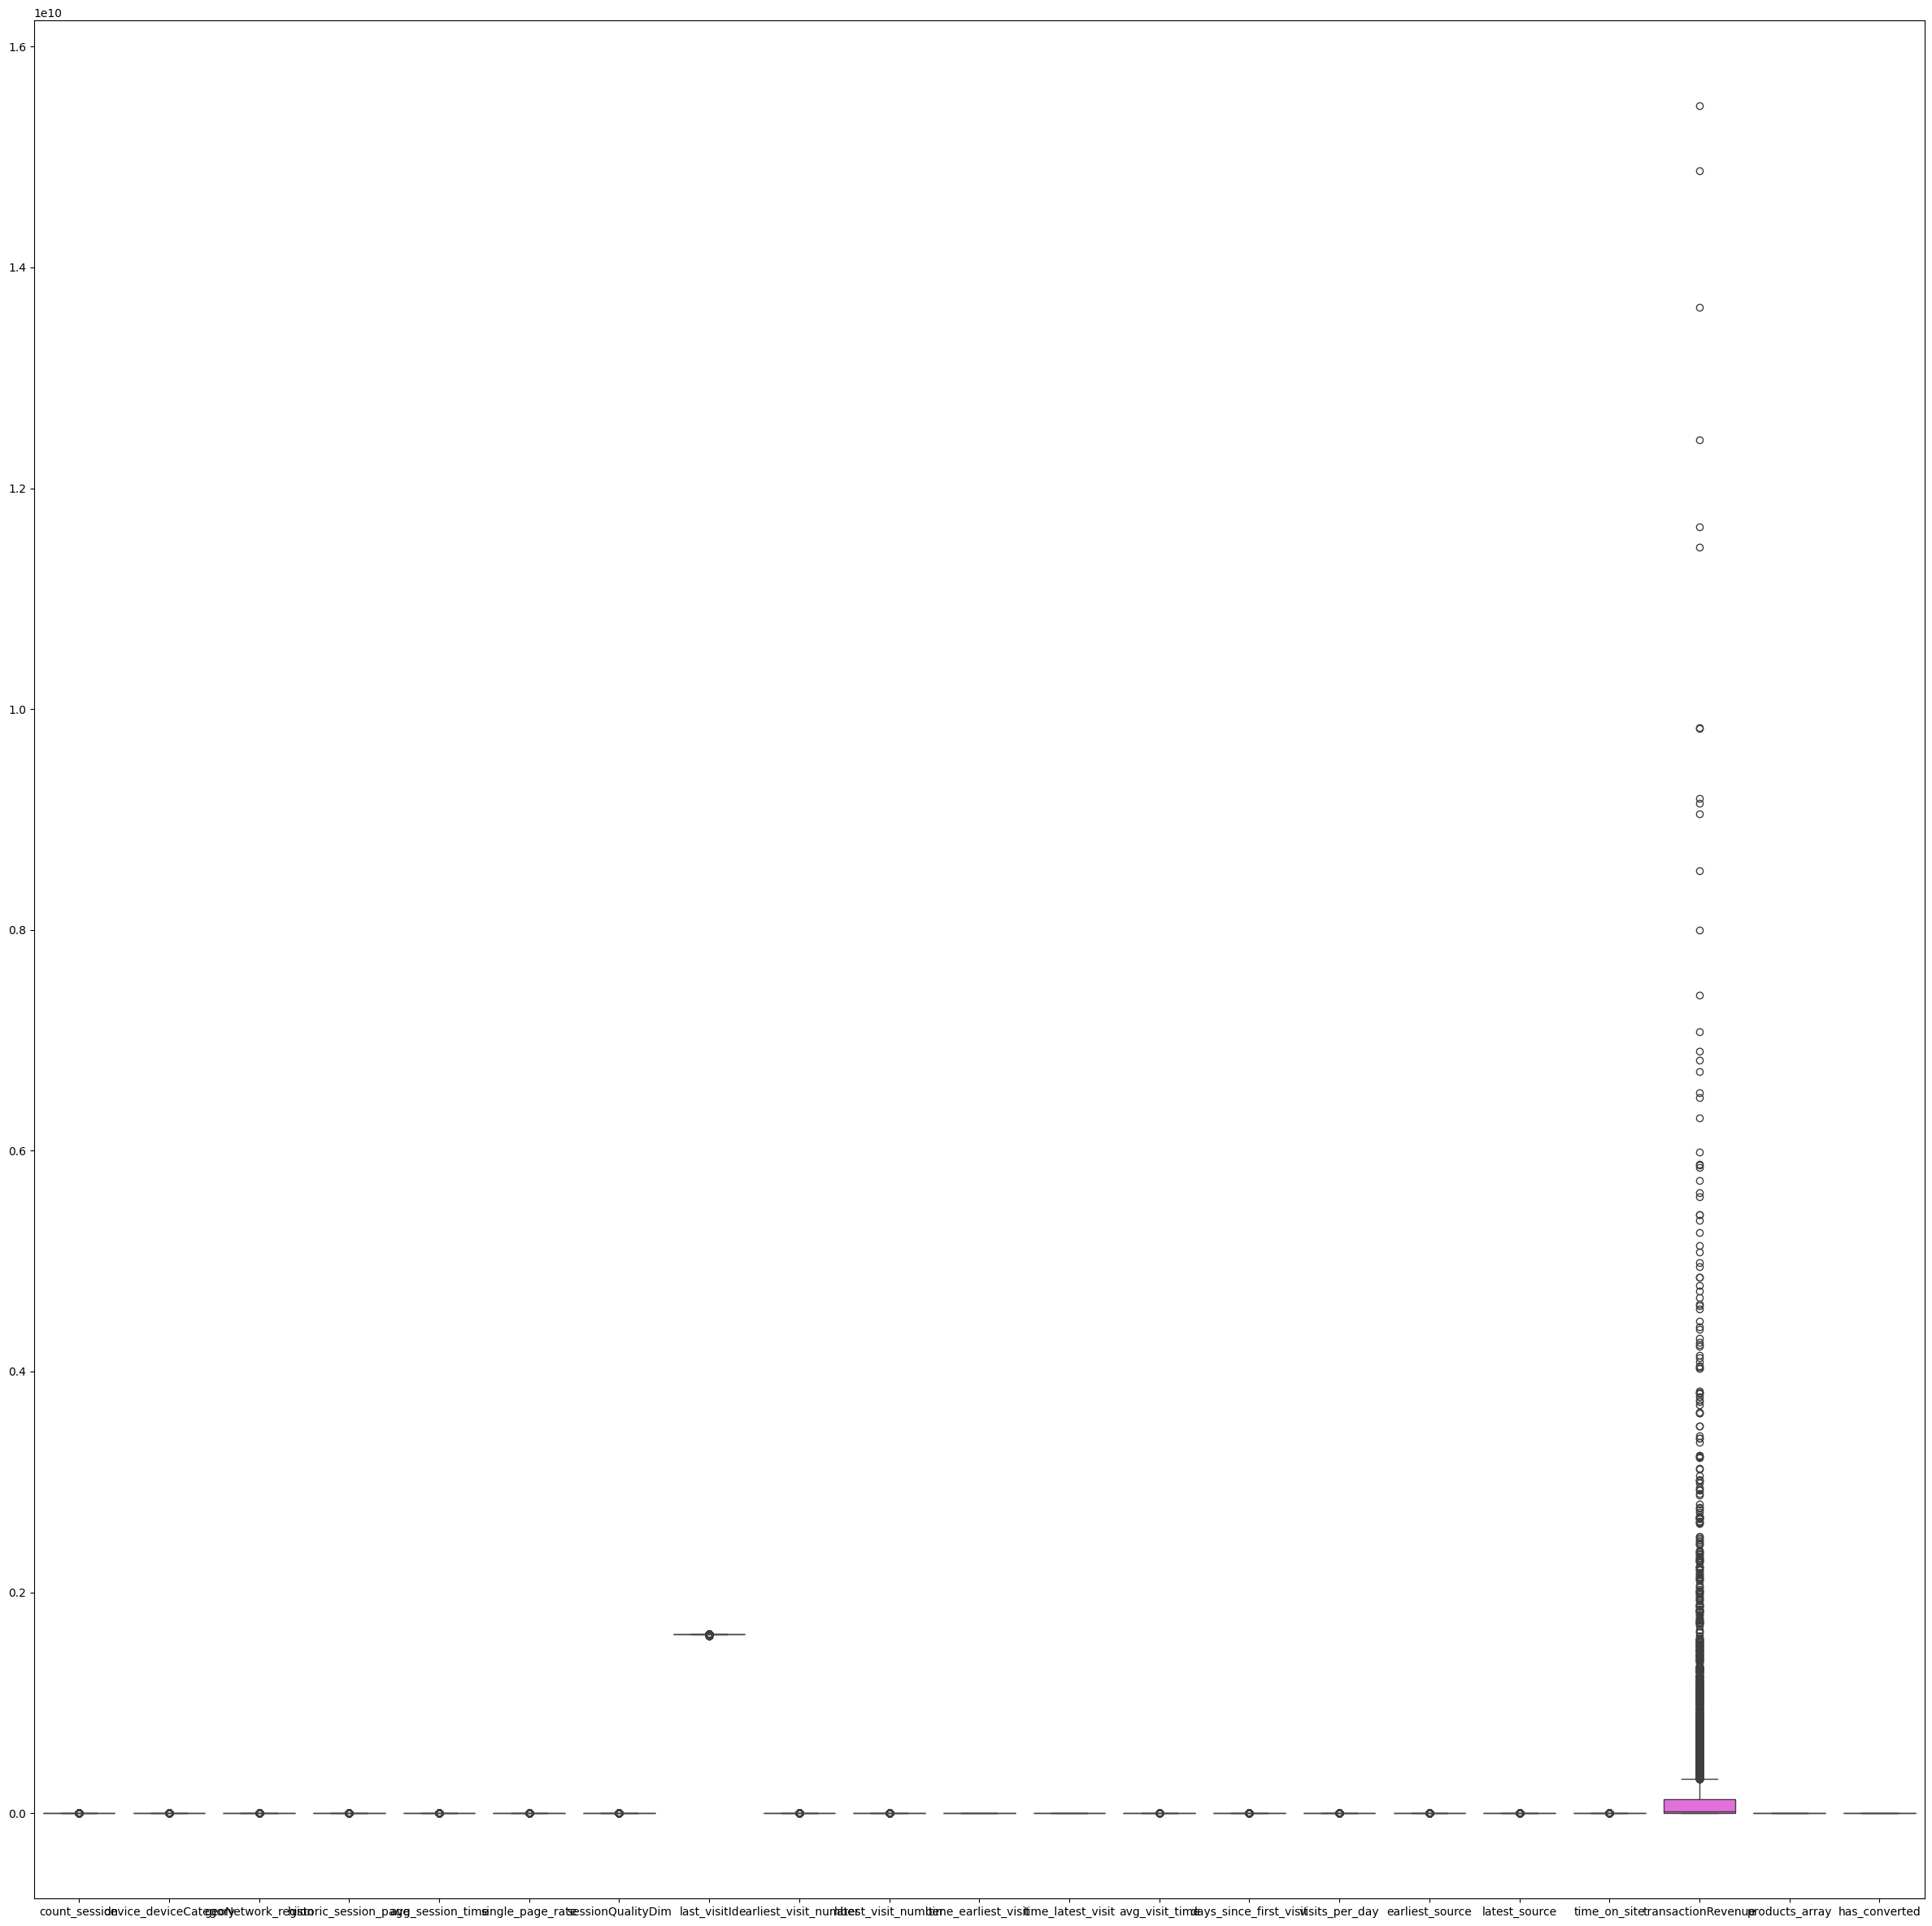

In [28]:
#outlier detection
plt.figure(figsize=(30,30))
sns.boxplot(data=data2)
plt.show()

In [119]:
#feature selection
#from sklearn.feature_selection import SelectKBest, chi2
#x= abs(data2.drop('has_converted',axis=1))
#y=data1['has_converted']

selection= SelectKBest(chi2, k=10)
data_select = selection.fit_transform(X,y)

In [121]:
df = pd.DataFrame({
    "columns":X.columns,
    "chi_sq_value": selection.scores_
}).sort_values('chi_sq_value',ascending=False).head(5)
print(df)

                  columns  chi_sq_value
18     transactionRevenue  1.287381e+12
17           time_on_site  6.591726e+06
3   historic_session_page  1.703851e+06
19         products_array  3.197366e+05
4        avg_session_time  1.261994e+05


In [30]:
from sklearn.ensemble import RandomForestClassifier
x=data2.drop('has_converted',axis=1)
y=data2['has_converted']
model=RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(x,y)

RandomForestClassifier(n_estimators=200, random_state=42)

In [33]:
df=pd.DataFrame({'column':x.columns,
                 'score':model.feature_importances_}).sort_values('score',ascending=False).head(5)['column'].tolist()
print(df)

['transactionRevenue', 'products_array', 'time_on_site', 'sessionQualityDim', 'historic_session_page']


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,auc,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [55]:
#model biuilding
X=data2[['transactionRevenue','time_on_site','historic_session_page','products_array','avg_session_time']]
y=data1['has_converted']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)
model_rf = RandomForestClassifier(n_estimators=50,random_state=42)
model_rf.fit(X_train,y_train)
model1 = DecisionTreeClassifier(
    
    criterion='entropy',   #### Performance
    splitter='best',
    max_depth=10,  #### Performance
    min_samples_split=2,  #### Performance
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,  #### Performance
    random_state=45,  #### Performance
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
model1.fit(X_train,y_train)
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)
model2 = svm.SVC(kernel='linear')
model1.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=45)

In [57]:
#training and testing prediction
train_pred = model_rf.predict(X_train)
test_pred = model_rf.predict(X_test)
train_pred1 = model1.predict(X_train)
test_pred1 = model1.predict(X_test)
train_pred2 = model1.predict(X_train)
test_pred2 = model1.predict(X_test)
train_pred3 = model1.predict(X_train)
test_pred3 = model1.predict(X_test)

In [ ]:
#training perfomance
print("Random Forest",classification_report(y_train,train_pred))
print("decision tree",classification_report(y_train,train_pred1))
print("logistic regression",classification_report(y_train,train_pred2))
print("SVM",classification_report(y_train,train_pred3))

In [59]:
#testing performance
print("Random Forest",classification_report(y_test,test_pred))
print("decision tree",classification_report(y_test,test_pred1))
print("logistic regression",classification_report(y_test,test_pred2))
print("SVM",classification_report(y_test,test_pred3))

Random Forest               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1081
           1       0.95      0.96      0.95       761

    accuracy                           0.96      1842
   macro avg       0.96      0.96      0.96      1842
weighted avg       0.96      0.96      0.96      1842

decision tree               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1081
           1       0.95      0.95      0.95       761

    accuracy                           0.96      1842
   macro avg       0.96      0.96      0.96      1842
weighted avg       0.96      0.96      0.96      1842

logistic regression               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1081
           1       0.95      0.95      0.95       761

    accuracy                           0.96      1842
   macro avg       0.96      0.96      0.96      1842
weighted avg       0.96   

In [36]:
data2[['transactionRevenue','time_on_site','historic_session_page','products_array','avg_session_time']]

,transactionRevenue,time_on_site,historic_session_page,products_array,avg_session_time
0,0,5617,1254,2265,722.666667
2,1477195214,77417,4963,898,445.214286
3,0,1576,0,2234,787.500000
16,28745286,1958,0,414,333.333333
20,1054124685,138440,0,2506,406.555556
...,...,...,...,...,...
99888,0,278,0,1,166.000000
99907,183879066,3810,4173,2265,566.428571
99908,363923999,0,0,1353,122.714286
99921,0,2958,0,2299,295.333333


In [4]:
#movie recommendation

movies=pd.read_csv("movies.csv")
ratings=pd.read_csv("ratings.csv")

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies.shape

(9742, 3)

In [8]:
ratings.shape

(100836, 4)

In [41]:
final_data= ratings.pivot(index='movieId',columns='userId',values='rating')

In [42]:
final_data

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
final_data.fillna(0,inplace=True)
final_data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#to check how many users have voted for particular movie
no_user_voted=ratings.groupby('movieId')['rating'].agg('count')
no_movies_rated=ratings.groupby("userId")['rating'].agg('count')


In [45]:
final_data= ratings.pivot(index='movieId',columns='userId',values='rating')

In [46]:
no_user_voted

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

Text(0, 0.5, 'no of user voted for the movie')

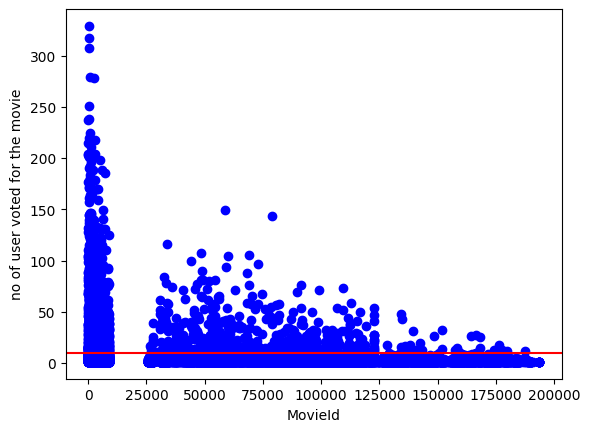

In [47]:
#visualizing data of no of user voted for a movie and setting threshold of voting count of a user for that movie
plt.scatter(no_user_voted.index,no_user_voted,color='blue')
plt.axhline(y=10,color='r')
plt.xlabel("MovieId")
plt.ylabel("no of user voted for the movie")

In [48]:
final_data=final_data.loc[no_user_voted[no_user_voted>10].index,:]
final_data.shape

(2121, 610)

In [49]:
#user rated for how many movie
no_movies_rated

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

Text(0, 0.5, 'No of movies voted')

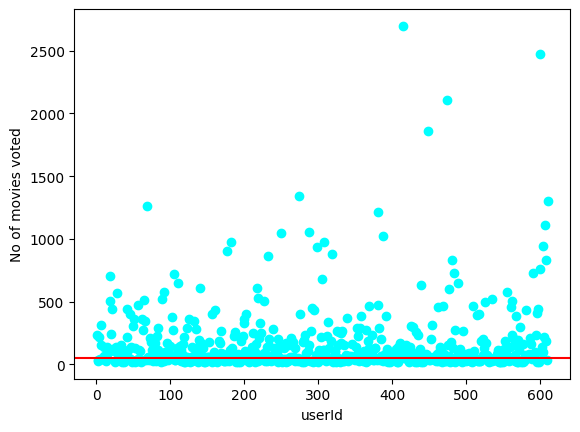

In [50]:
#visualizing data of no of movies rated by user and setting threshold as 50
plt.scatter(no_movies_rated.index,no_movies_rated,color='cyan')
plt.axhline(y=50,color='r')
plt.xlabel("userId")
plt.ylabel("No of movies voted")

In [51]:
final_data=final_data.loc[:,no_movies_rated[no_movies_rated>50].index]
final_data.shape

(2121, 378)

In [52]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [56]:
final_data.fillna(0,inplace=True)

In [62]:
csr_data=csr_matrix(final_data.values)
final_data.reset_index(inplace=True)

In [63]:
final_data

userId,index,movieId,1,4,6,7,10,11,15,16,...,600,601,602,603,604,605,606,607,608,610
0,0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
1,1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
2,2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,2116,174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2117,2117,176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118,2118,177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2119,2119,179819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
knn=NearestNeighbors(metric='eucledian',algorithm='brute',n_neighbors=5,n_jobs=-1)

In [64]:
knn=NearestNeighbors(n_neighbors=5)
knn.fit(csr_data)

NearestNeighbors()

In [65]:
from fuzzywuzzy import process

c:\Users\Ganesh Kumar\Desktop\New folder\.venv\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [66]:
def recommend(movie_name):
    no_of_recommandation=5
    idx=process.extractOne(movie_name,movies['title'])[2]
    matrix_data=csr_data[idx]
    print("Movie Selected :",movies['title'][idx])
    print("Searching for Recommandation......")
    distance, indices = knn.kneighbors(matrix_data,n_neighbors=no_of_recommandation)
    print(distance,indices)
    for i in indices:
        print(mo)


In [67]:
recommend('toy story')

Movie Selected : Toy Story (1995)
Searching for Recommandation......
[[ 0.         48.17935242 48.99744891 50.11486805 50.14479036]] [[0 1 7 3 2]]
